In [1]:
from mpl_toolkits import mplot3d

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from utils_kernel import euclidean_kernel, hard_geodesics_euclidean_kernel
from utils_visualization import plot_kernel

/Users/cchallu/anaconda3/envs/intro_ml/lib/python3.7/site-packages/scipy/__init__.py:115: UserWarning: Numpy 1.13.3 or above is required for this version of scipy (detected version 1.11.3)
  UserWarning)


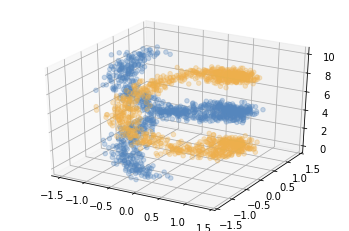

In [155]:
ax = plt.axes(projection='3d')

height = 10
noise = 0.15
x_width = 1
y_width = 1
sample = 1000
curls = 1.2

# Data for a three-dimensional line
#zline = np.linspace(0, height, 1000)
#xline = x_width*np.sin(zline/enrosques)
#yline = y_width*np.cos(zline/enrosques)
#ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = height * np.random.random(sample)
xdata = x_width*np.sin(zdata/curls) + noise * np.random.randn(sample)
ydata = y_width*np.cos(zdata/curls) + noise * np.random.randn(sample)
ax.scatter3D(xdata, ydata, zdata, color='#edaf4c', alpha=0.3);

xdata2 = x_width*np.sin(zdata/curls+3.14) + noise * np.random.randn(sample)
ydata2 = y_width*np.cos(zdata/curls+3.14) + noise * np.random.randn(sample)
ax.scatter3D(xdata2, ydata2, zdata, color='#5586bd', alpha=0.3);

In [156]:
features1 = np.column_stack((xdata, ydata, zdata))
features2 = np.column_stack((xdata2, ydata2, zdata))
features = np.concatenate([features1,features2])

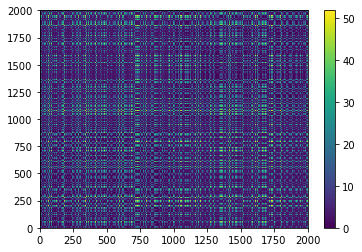

In [157]:
euclidean_matrix = euclidean_kernel(features)
plot_kernel(euclidean_matrix)

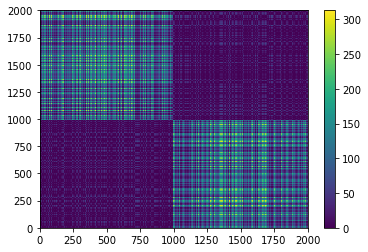

In [160]:
geodesic_euclidean_matrix = hard_geodesics_euclidean_kernel(features, 100)
plot_kernel(geodesic_euclidean_matrix)

In [161]:
k = 400
euclidean_neighbors_idx = np.argpartition(euclidean_matrix[0,:],k)[:k]
euclidean_neighbors = features[euclidean_neighbors_idx]

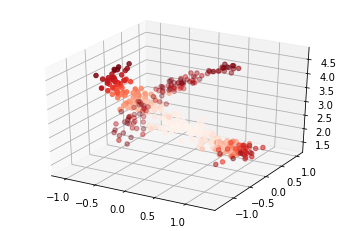

In [162]:
ax = plt.axes(projection='3d')
ax.scatter3D(euclidean_neighbors[:,0], euclidean_neighbors[:,1], euclidean_neighbors[:,2], c=euclidean_matrix[0,euclidean_neighbors_idx], cmap='Reds');

In [163]:
k = 400
geodesic_neighbors_idx = np.argpartition(geodesic_euclidean_matrix[0,:],k)[:k]
geodesic_neighbors = features[geodesic_neighbors_idx]

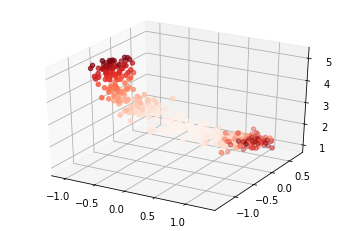

In [164]:
ax = plt.axes(projection='3d')
ax.scatter3D(geodesic_neighbors[:,0], geodesic_neighbors[:,1], geodesic_neighbors[:,2],
             c=geodesic_euclidean_matrix[0,geodesic_neighbors_idx], cmap='Reds')

In [165]:
(euclidean_neighbors_idx>=1000).mean()

0.27250000000000002

In [166]:
(geodesic_neighbors_idx>=1000).mean()

0.0